In [1]:
import imutils
import numpy as np
import cv2
import os
from google.colab import drive
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import dlib


# **Import and Prepare the Dataset**

In [2]:
#!wget https://drive.google.com/uc?export=download&id=1aTdDH-M_G0ukOrk7NOKLzCYcXWzgqGRT
!pip install --upgrade --no-cache-dir gdown
!gdown --id 1aTdDH-M_G0ukOrk7NOKLzCYcXWzgqGRT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1aTdDH-M_G0ukOrk7NOKLzCYcXWzgqGRT
From (redirected): https://drive.google.com/uc?id=1aTdDH-M_G0ukOrk7NOKLzCYcXWzgqGRT&confirm=t&uuid=41b9d71d-d39d-4573-91b2-7bc4f54b4fb0
To: /content/Dataset.zip
100% 1.75G/1.75G [00:17<00:00, 101MB/s]


In [3]:
%%capture
!unzip /content/Dataset.zip

In [4]:
DATASET_PATH = '/content/Dataset'

os.listdir(DATASET_PATH)

['Validation', 'Test', 'Train']

In [5]:
TRAIN_DIR = os.path.join(DATASET_PATH, 'Train')
TEST_DIR = os.path.join(DATASET_PATH, 'Test')
VAL_DIR = os.path.join(DATASET_PATH, 'Validation')

In [6]:
BrownCar_dir = os.path.join(TRAIN_DIR, 'Browned Caramel')
CacaoBlack_dir = os.path.join(TRAIN_DIR, 'Cacao Black Skin')
EspressMilk_dir = os.path.join(TRAIN_DIR, 'Espresso Milk Chocolate')
Fair_dir = os.path.join(TRAIN_DIR, 'Fair')
DarkMed_dir = os.path.join(TRAIN_DIR, 'Dark Medium')
lightMed_dir = os.path.join(TRAIN_DIR, 'Light Medium')

print('total training Browned Caramel images:', len(os.listdir(BrownCar_dir)))
print('total training Cacao Black Skin images:', len(os.listdir(CacaoBlack_dir)))
print('total training Espresso Milk Chocolate images:', len(os.listdir(EspressMilk_dir)))
print('total training Fair images:', len(os.listdir(Fair_dir)))
print('total training Dark Medium images:', len(os.listdir(DarkMed_dir)))
print('total training Light Medium images:', len(os.listdir(lightMed_dir)))

BrownCar_files = os.listdir(BrownCar_dir)
print(BrownCar_files[:10])

CacaoBlack_files = os.listdir(CacaoBlack_dir)
print(CacaoBlack_files[:10])

EspressMilk_files = os.listdir(EspressMilk_dir)
print(EspressMilk_files[:10])

Fair_files = os.listdir(Fair_dir)
print(Fair_files[:10])

DarkMed_files = os.listdir(DarkMed_dir)
print(DarkMed_files[:10])

lightMed_files = os.listdir(lightMed_dir)
print(lightMed_files[:10])

total training Browned Caramel images: 440
total training Cacao Black Skin images: 310
total training Espresso Milk Chocolate images: 711
total training Fair images: 702
total training Dark Medium images: 651
total training Light Medium images: 524
['586 - Copy - Copy.jpg', 'avatar-4daba9c59b7aa5de6b309187b846f9e2.jpg', '586 - Copy.jpg', '3742.jpg', '1309 - Copy (2).jpg', '1686.jpg', 'image (69) - Copy - Copy.jpg', 'avatar-bccaec2def5d7218ca53b0f554877f21 (2) - Copy.jpg', 'avatar-fb93f04a5f3f1d122bd5cdbbd207ce30.jpg', '367 - Copy.jpg']
['main-qimg-7da87ae3efb0f68ac06b57afc57251d3-lq - C12 - Copy (28).jpg', 'main-qimg-7da87ae3efb0f68ac06b57afc57251d3-lq - C12 - Copy (11).jpg', '39 - Copy (21) - Copy - Copy.jpg', 'main-qimg-7da87ae3efb0f68ac06b57afc57251d3-lq - C12 - Copy (12).jpg', 'images - Copy.jpg', '610794044-tumblr_l5s21gkDYM1qbrimro1_400 - Copy (9).jpg', 'images (4) - Copy.jpg', 'black-skin-melanin-boy-and-girl-min - Copy - Copy (17) - Copy - Copy - Copy.jpg', 'images - Copy (4) -

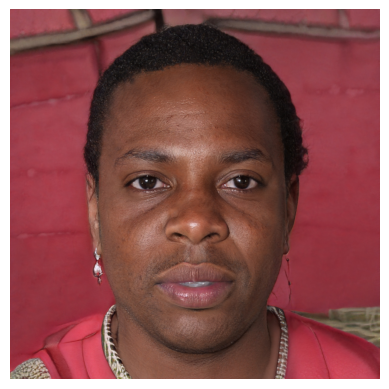

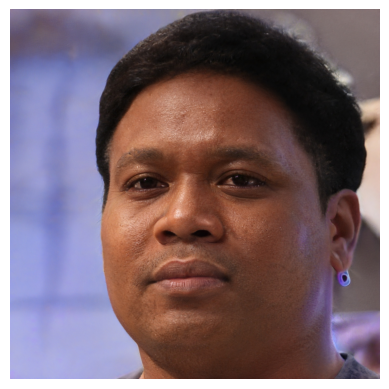

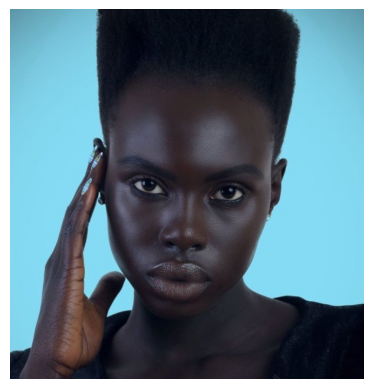

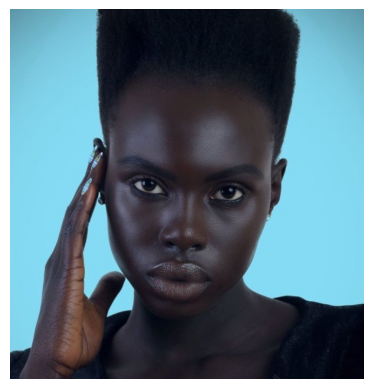

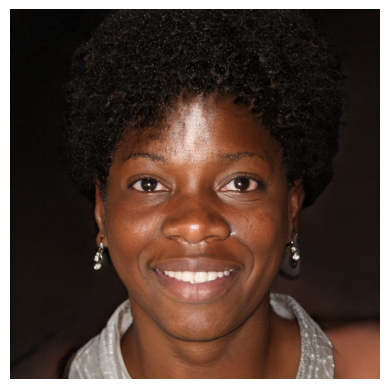

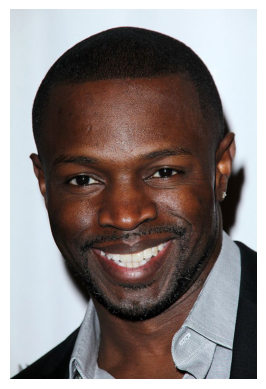

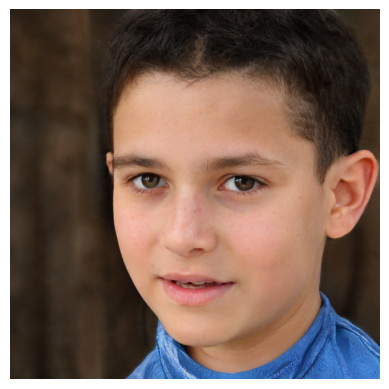

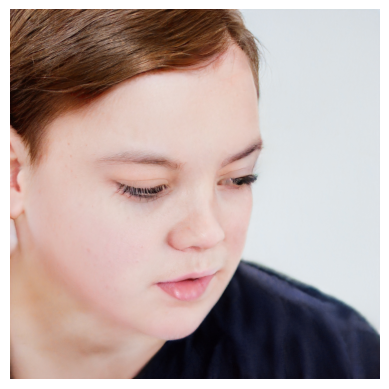

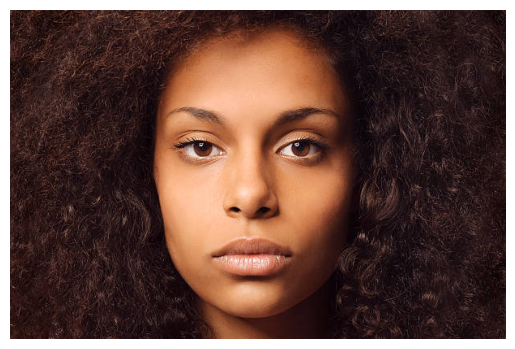

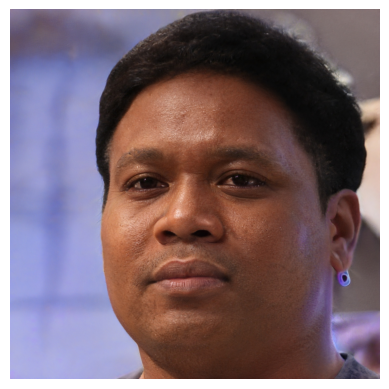

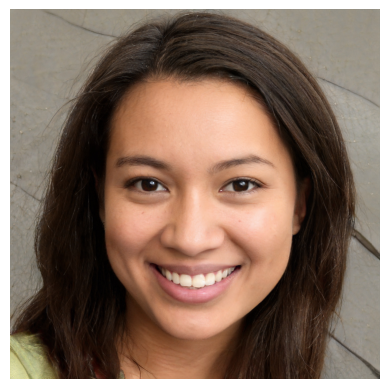

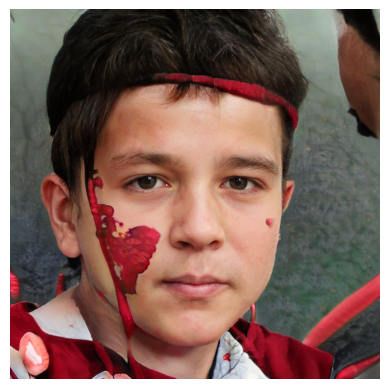

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_BrownCar = [os.path.join(BrownCar_dir, fname)
                for fname in BrownCar_files[pic_index-2:pic_index]]
next_CacaoBlack = [os.path.join(CacaoBlack_dir, fname)
                for fname in CacaoBlack_files[pic_index-2:pic_index]]
next_EspressMilk = [os.path.join(EspressMilk_dir, fname)
                for fname in EspressMilk_files[pic_index-2:pic_index]]
next_Fair = [os.path.join(Fair_dir, fname)
                for fname in Fair_files[pic_index-2:pic_index]]
next_DarkMed = [os.path.join(DarkMed_dir, fname)
                for fname in DarkMed_files[pic_index-2:pic_index]]
next_lightMed = [os.path.join(lightMed_dir, fname)
                for fname in lightMed_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_BrownCar+next_CacaoBlack+next_EspressMilk+next_Fair+next_DarkMed+next_lightMed):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# **Prepare ImageDataGenerator**

Setting the training set up for data augmentation so it can mimick other poses that the model needs to learn.

In [8]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

TRAINING_DIR = os.path.join(DATASET_PATH, 'Train')
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = os.path.join(DATASET_PATH, 'Validation')
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 3338 images belonging to 6 classes.
Found 716 images belonging to 6 classes.


# **Build the model**


Building the CNN. We will use 5 convolution layers with 16-32-64-64-64 filters and some Dense layers for the classification.

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(6, activation='softmax')
])


# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [10]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
       optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
       metrics=['accuracy'])


# **Train the model and evaluate the results**

In [11]:
# Train your model
history = model.fit(train_generator,epochs=85,validation_data=validation_generator)

Epoch 1/85


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


27/27 [==============================] - 149s 5s/step - loss: 1.7390 - accuracy: 0.2561 - val_loss: 1.5312 - val_accuracy: 0.3673
Epoch 2/85
27/27 [==============================] - 134s 5s/step - loss: 1.5350 - accuracy: 0.3613 - val_loss: 1.2848 - val_accuracy: 0.5042
Epoch 3/85
27/27 [==============================] - 136s 5s/step - loss: 1.4070 - accuracy: 0.4332 - val_loss: 1.2087 - val_accuracy: 0.4804
Epoch 4/85
27/27 [==============================] - 133s 5s/step - loss: 1.3235 - accuracy: 0.4509 - val_loss: 1.1736 - val_accuracy: 0.4623
Epoch 5/85
27/27 [==============================] - 138s 5s/step - loss: 1.2835 - accuracy: 0.4850 - val_loss: 1.0130 - val_accuracy: 0.6271
Epoch 6/85
27/27 [==============================] - 136s 5s/step - loss: 1.2184 - accuracy: 0.5270 - val_loss: 0.9504 - val_accuracy: 0.6117
Epoch 7/85
27/27 [==============================] - 135s 5s/step - loss: 1.1150 - accuracy: 0.5443 - val_loss: 1.1191 - val_accuracy: 0.5196
Epoch 8/85
27/27 [======

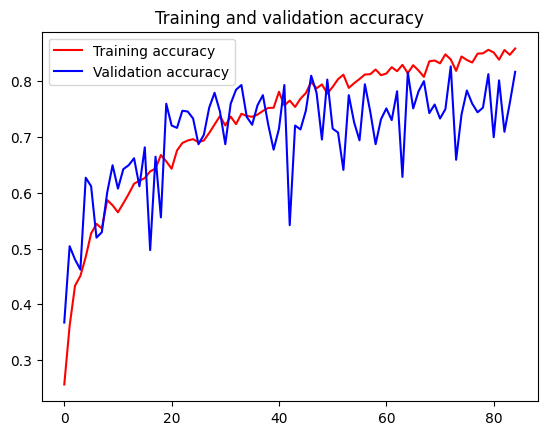

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

#**Save the model**

In [13]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [14]:
#model.save_weights('/content/gdrive/MyDrive/Final_Model.h5')
#model.save_weights('Final_model.h5')
model.save('/content/gdrive/MyDrive/Final_model.h5')

In [16]:
import tensorflow as tf

saved_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Final_model.h5')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

# **Predicting New Images**

In [17]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

400 300


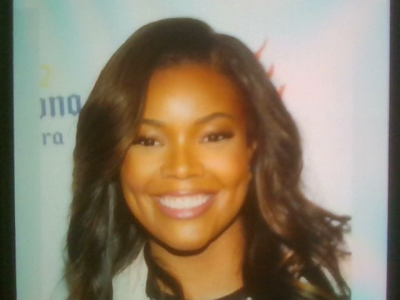

1/1 [==============================] - 0s 293ms/step
[[3.55173796e-02 6.07953698e-05 9.52702105e-01 1.81305168e-05
  1.16606895e-02 4.08378437e-05]]
Espresso Milk Chocolate


In [18]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

image_file = take_photo()
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

img = cv2.resize(image,(150,150))
x = np.asarray(img)
x = x/255
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)
#if classes[0]>0.5:print(fn + " is a dog")else:print(fn + " is a cat")

index_max = np.argmax(classes)
if index_max==0:
  print("Browned Caramel")
elif index_max==1:
  print("Cocoa Black Skin")
elif index_max==2:
  print("Espresso Milk Chocolate")
elif index_max==3:
  print("Fair")
elif index_max==4:
  print("Dark Medium")
else:
  print("Light Med")

# **Import Data on Reccommended Lipstick Color**

In [19]:
!gdown --id 1dYU4EqqLljnqWNBBeXYZ_LvBJRfcTkXA

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dYU4EqqLljnqWNBBeXYZ_LvBJRfcTkXA
To: /content/LipstickColor-20230612T110947Z-001.zip
100% 9.71M/9.71M [00:00<00:00, 45.4MB/s]


In [20]:
%%capture
!unzip /content/LipstickColor-20230612T110947Z-001.zip

In [21]:
LipstickColors = '/content/LipstickColor'

os.listdir(LipstickColors)

['Dark Medium',
 'Browned Caramel',
 'Espresso Milk Chocolate',
 'Light Medium',
 'Fair',
 'Cacao Black Skin']

In [22]:
BrownCar_ls = os.path.join(LipstickColors, 'Browned Caramel')
CacaoBlack_ls = os.path.join(LipstickColors, 'Cacao Black Skin')
EspressMilk_ls = os.path.join(LipstickColors, 'Espresso Milk Chocolate')
Fair_ls = os.path.join(LipstickColors, 'Fair')
DarkMed_ls = os.path.join(LipstickColors, 'Dark Medium')
lightMed_ls = os.path.join(LipstickColors, 'Light Medium')

BrownCar_lsfiles = os.listdir(BrownCar_ls)
print(BrownCar_lsfiles[:10])

CacaoBlack_lsfiles = os.listdir(CacaoBlack_ls)
print(CacaoBlack_lsfiles[:10])

EspressMilk_lsfiles = os.listdir(EspressMilk_ls)
print(EspressMilk_lsfiles[:10])

Fair_lsfiles = os.listdir(Fair_ls)
print(Fair_lsfiles[:10])

DarkMed_lsfiles = os.listdir(DarkMed_ls)
print(DarkMed_lsfiles[:10])

lightMed_lsfiles = os.listdir(lightMed_ls)
print(lightMed_lsfiles[:10])

['Dubonnet Buzz.jpg', 'Spill The Tea.jpg', 'Shamelessly Vain.jpg', 'Mehr.jpg', 'It_s All Me.jpg', 'Sheer Outrage.jpg', 'La Femme.jpg', 'Fashion Emergency.jpg', 'Taupe.jpg', 'Got A Callback.jpg']
['TNTeaser.jpg', 'All Things Magical.jpg', 'Antique Velvet.jpg', 'P for Potent.jpg', 'Moth To Flame.jpg', 'Diva.jpg', 'Marrakesh Me Later.jpg', 'MAC Red.jpg', 'D For Danger.jpg', 'PRRR.jpg']
['berry-succumb to plum.jpg', 'pink-i vote for me.jpg', 'nude-double fudge.jpg', 'red-viva glam I.jpg', 'orange-sorry not sorry.jpg', 'berry-diva.jpg', 'nude-consensual.jpg', 'orange-local celeb.jpg', 'pink-under the covers.jpg', 'red-pda.jpg']
['berry-kinda soarta.jpg', 'nude-velvet teddy.jpg', 'nude-come over.jpg', 'red-maison rouge.jpg', 'pink-get the hint.jpg', 'red-ring the alarm.jpg', 'orange-marrakeshmere.jpg', 'berry-whatta doll.jpg', 'pink-mull it over.jpg', 'orange-mandarino.jpg']
['1. bated breath_11zon.jpg', '3. my lips are ensured_11zon.jpg', '1. beam there done that_11zon.jpg', '2. kinda sexy_

# **Output Recommended Lipstick Based on Predicted Skintone**

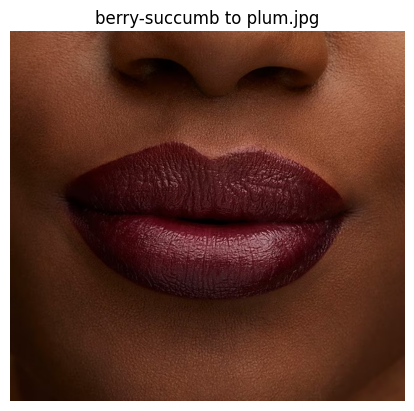

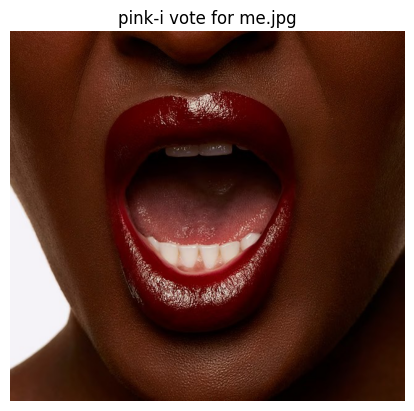

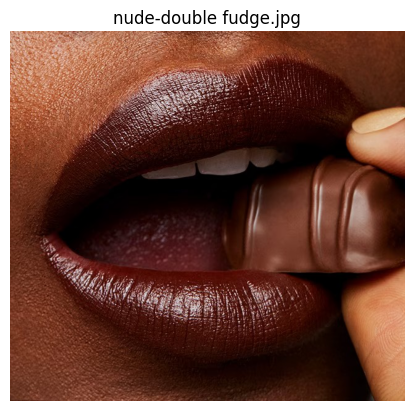

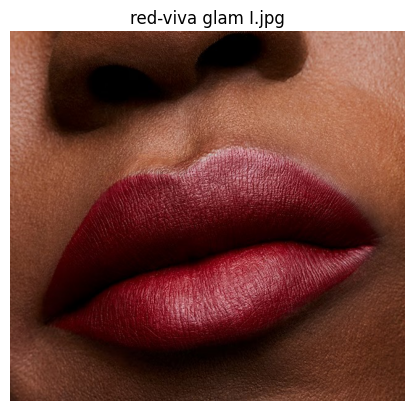

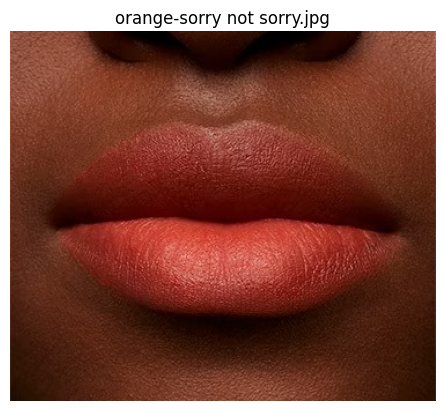

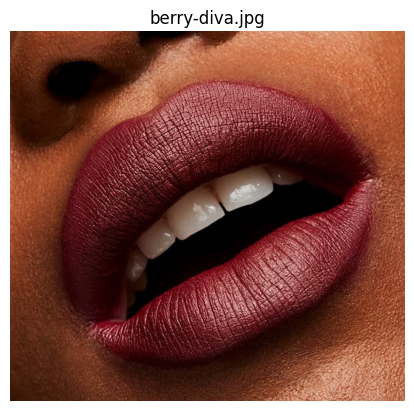

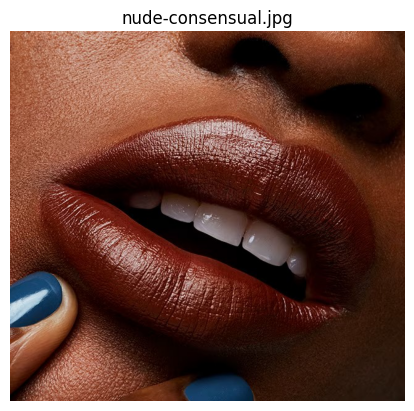

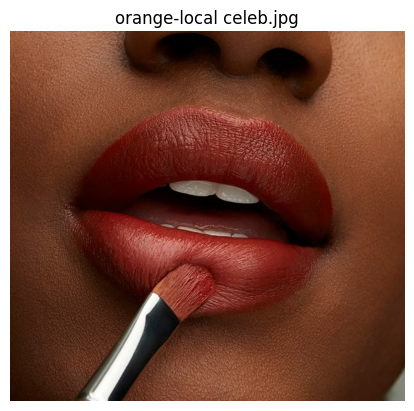

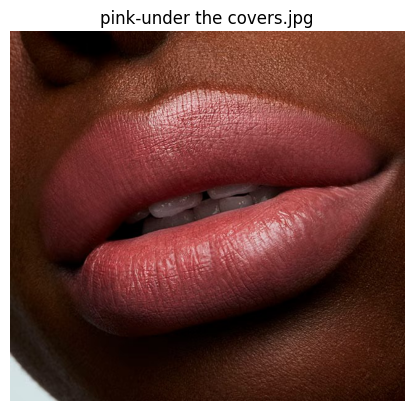

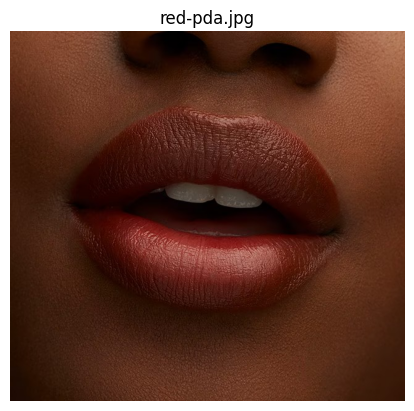

In [23]:
pic_index = 10
if index_max==0:
  lipstick_rec = [os.path.join(BrownCar_ls, fname)
                for fname in BrownCar_lsfiles[pic_index-10:pic_index]]
  r = BrownCar_lsfiles
elif index_max==1:
  lipstick_rec = [os.path.join(CacaoBlack_ls, fname)
                for fname in CacaoBlack_lsfiles[pic_index-10:pic_index]]
  r = CacaoBlack_lsfiles
elif index_max==2:
  lipstick_rec = [os.path.join(EspressMilk_ls, fname)
                for fname in EspressMilk_lsfiles[pic_index-10:pic_index]]
  r = EspressMilk_lsfiles
elif index_max==3:
  lipstick_rec = [os.path.join(Fair_ls, fname)
                for fname in Fair_lsfiles[pic_index-10:pic_index]]
  r = Fair_lsfiles
elif index_max==4:
  lipstick_rec = [os.path.join(DarkMed_ls, fname)
                for fname in DarkMed_lsfiles[pic_index-10:pic_index]]
  r = DarkMed_lsfiles
else:
  lipstick_rec = [os.path.join(lightMed_ls, fname)
                for fname in lightMed_lsfiles[pic_index-10:pic_index]]
  r = lightMed_lsfiles

for i, img_path in enumerate(lipstick_rec):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(r[i])
  plt.axis('Off')
  plt.show()